In [94]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import scipy
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

%load_ext autoreload
%autoreload 2

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

In [133]:
### Draw the old pareto front line from Li et al 2019
old_muts = merged_fitness[merged_fitness['source_publication'].isin(['Venkataram2015','Li2019'])]

points = old_muts[['FerPerHour_Li2019','ResPerHour_Li2019']].values
points = points[~np.isnan(points).any(axis=1)]

hull = scipy.spatial.ConvexHull(points)

pareto_line = (list(points[hull.vertices,0][5:-1])+[0],list(points[hull.vertices,1][5:-1])+[np.nanmax(old_muts['ResPerHour_Li2019'].values)])

# plt.plot(pareto_line[0],pareto_line[1], 'r--', lw=2)
# plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

In [96]:
def count_tradeoffs(data_x,data_y,
                    background_data_x,background_data_y,
                    background_error_x,background_error_y,
                    multiplier=1.96):
    
    x_improved = (data_x>(background_data_x+multiplier*np.sqrt(background_error_x)))
    y_improved = (data_y>(background_data_y+multiplier*np.sqrt(background_error_y)))
    both_improved = np.logical_and(x_improved,y_improved)
    
    
    return sum(x_improved)-sum(both_improved),sum(y_improved)-sum(both_improved),sum(both_improved),len(both_improved)

    
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/patches.py:1123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/patches.py:1123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/patches.py:1123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

FerPerHour ResPerHour
CYR1 ['Evo1D'] (0, 3, 0, 13)
CYR1 ['Evo2D'] (8, 58, 12, 112)
CYR1 ['Evo3D'] (0, 21, 2, 23)
GPB2 ['Evo1D'] (1, 11, 1, 15)
GPB2 ['Evo2D'] (3, 70, 3, 106)
GPB2 ['Evo3D'] (0, 13, 1, 14)
TOR1 ['Evo1D'] (0, 17, 3, 21)
TOR1 ['Evo2D'] (2, 96, 5, 144)
TOR1 ['Evo3D'] (0, 2, 0, 2)
IRA1_MIS ['Evo1D'] (4, 1, 0, 12)
IRA1_MIS ['Evo2D'] (2, 71, 3, 84)
IRA1_MIS ['Evo3D'] (0, 23, 5, 29)
IRA1_NON ['Evo1D'] (7, 3, 2, 12)
IRA1_NON ['Evo2D'] (0, 88, 1, 95)
IRA1_NON ['Evo3D'] (0, 133, 1, 134)
FerPerHour StaPerHour
CYR1 ['Evo1D'] (0, 2, 0, 13)
CYR1 ['Evo2D'] (19, 32, 1, 112)
CYR1 ['Evo3D'] (2, 12, 0, 23)
GPB2 ['Evo1D'] (1, 2, 1, 15)
GPB2 ['Evo2D'] (6, 7, 0, 106)
GPB2 ['Evo3D'] (1, 3, 0, 14)
TOR1 ['Evo1D'] (3, 1, 0, 21)
TOR1 ['Evo2D'] (4, 13, 3, 144)
TOR1 ['Evo3D'] (0, 0, 0, 2)
IRA1_MIS ['Evo1D'] (3, 0, 1, 12)
IRA1_MIS ['Evo2D'] (4, 19, 1, 84)
IRA1_MIS ['Evo3D'] (5, 16, 0, 29)
IRA1_NON ['Evo1D'] (9, 0, 0, 12)
IRA1_NON ['Evo2D'] (1, 35, 0, 95)
IRA1_NON ['Evo3D'] (1, 112, 0, 134)
ResPerHour

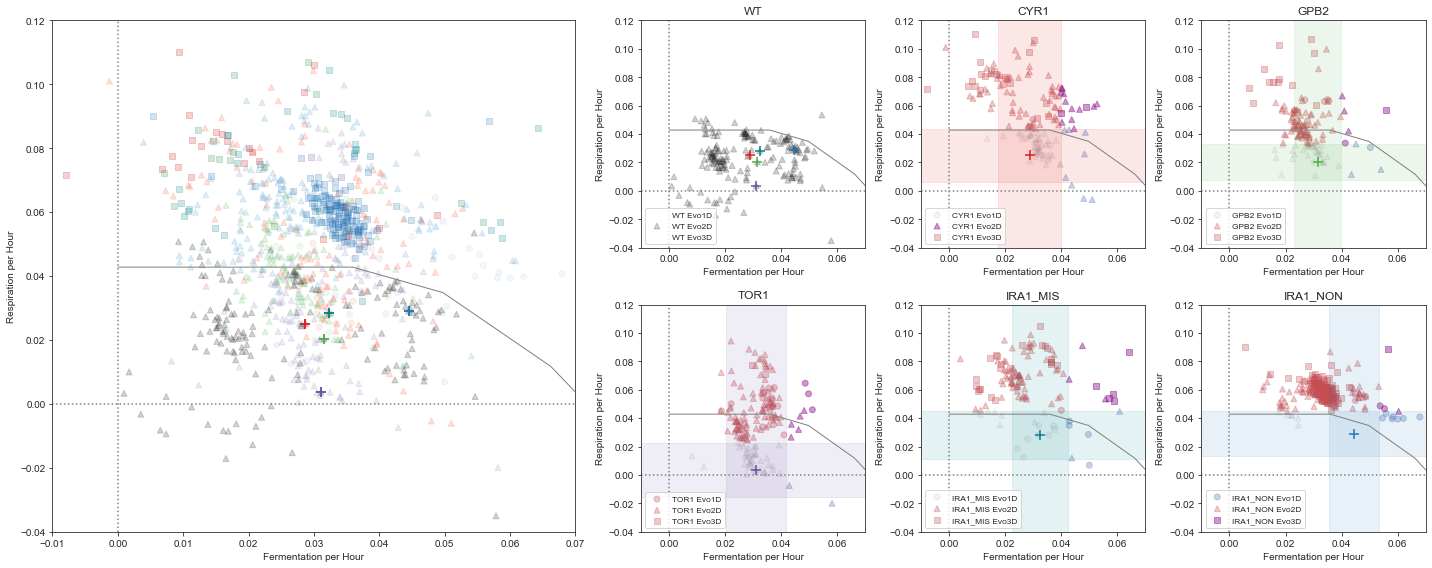

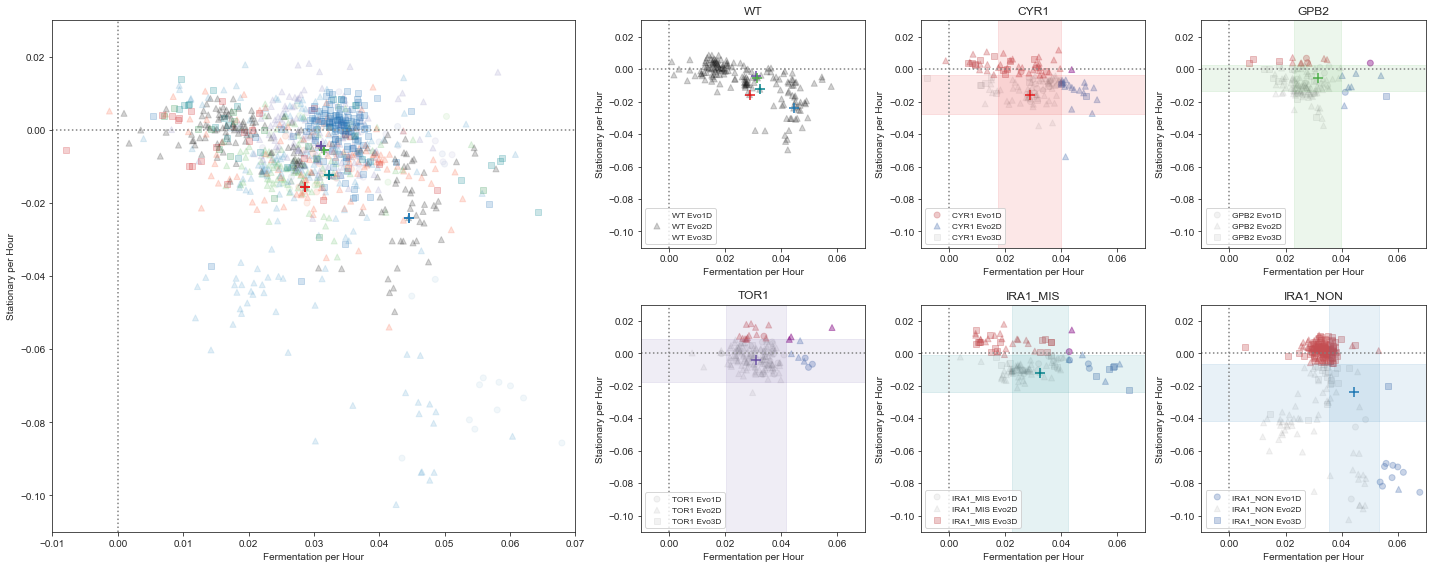

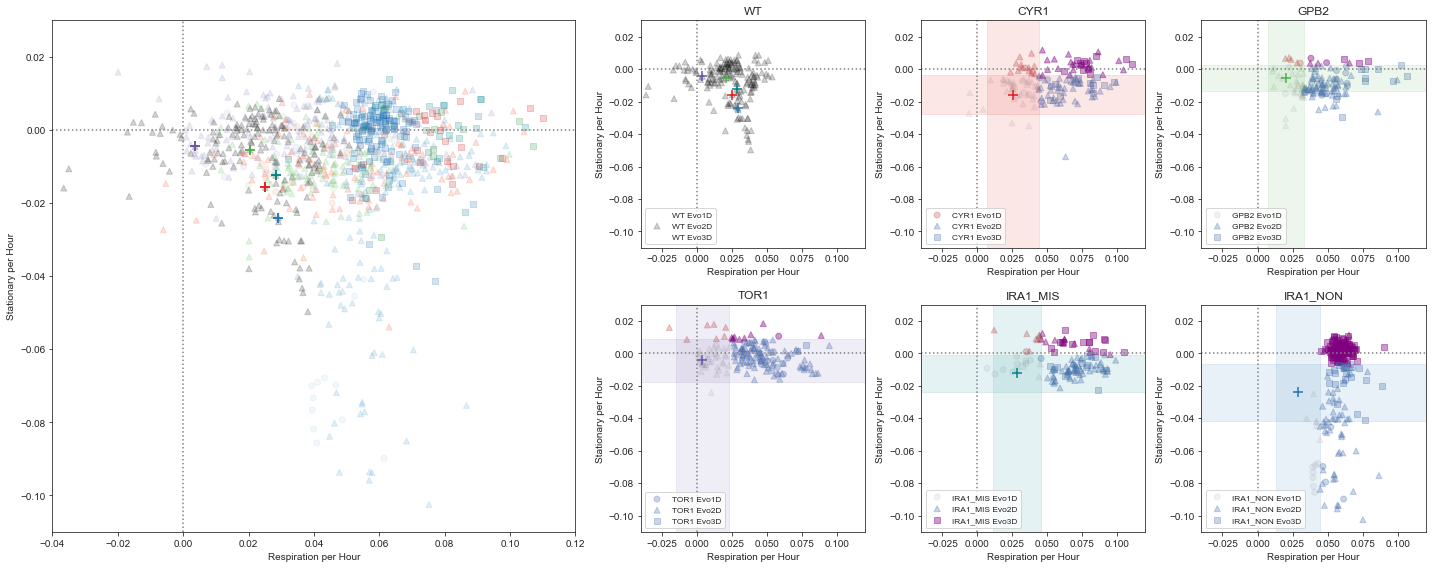

In [157]:
colors = [tools.anc_color_map[anc] for anc in merged_fitness['ancestor']]
# colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in nonan_merged['source_publication_x']]

# non_diploid = merged_fitness[merged_fitness['ploidy']!='Diploid']

xlabel = 'Fermentation per Hour'
ylabel = 'Respiration per Hour'
xdata = 'FerPerHour'
ydata = 'ResPerHour'

xlabel = 'Stationary per Hour'
ylabel = 'Respiration per Hour'
xdata = 'StaPerHour'
ydata = 'ResPerHour'
labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

# evo_cond_list = ['Evo1D']
evo_cond_list = ['Evo2D']
# evo_cond_list = ['Evo3D']
evo_cond_list = ['Evo1D','Evo2D','Evo3D']


# cutoff for standard deviation
multiplier = 1.0

noLi2019 = merged_fitness[merged_fitness['source_publication']!='Li2019']

for xdata,ydata in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
# publication_list = [['This_study','Li2019','Aggeli2020','Venkataram2015'],['Venkataram2015'],['Li2019'],['Aggeli2020'],['This_study'],['Venkataram2015','This_study']] 
    ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]
    fig = plt.figure(figsize=(20,8))
    outer_gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])

    for a,ancs in enumerate(ancestor_list):
        inner_gs = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)
#         this_anc = non_diploid[non_diploid['ancestor'].isin(ancs)]
        
        this_anc = noLi2019[noLi2019['ancestor'].isin(ancs)]
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values
        
        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]

        if len(ancs) > 1:
            fig.add_subplot(outer_gs[0]) 
        else:
            fig.add_subplot(inner_gs[a-1])
            
#         for anc in ancs:
#             if anc != 'WT':
#                 this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

#                 sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
#                             color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

#                 this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

#                 sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
#                             color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

#         for evo_cond in np.unique(this_anc['evolution_condition'].values):
        for evo_cond in evo_cond_list:
            this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
            gray_alpha = 0.1
            bold_alpha = 0.5
            if len(ancs) < 2:
                
                anc = ancs[0]
                if anc != 'WT':
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

                    colors = []
                    annotation_list = []
                    for e,gene in enumerate(this_data['gene'].values):

                        x_improved = False
                        y_improved = False
                        both_improved = False

                        color_assigned = matplotlib.colors.to_rgba('gray',0.1)

                        if this_data[xdata].values[e] > background_mutant[xdata].values[0]+multiplier*np.sqrt(background_mutant[xdata+'_error'].values[0]):
                            x_improved = True
                            color_assigned = matplotlib.colors.to_rgba('b',0.3)
                        if this_data[ydata].values[e] > background_mutant[ydata].values[0]+multiplier*np.sqrt(background_mutant[ydata+'_error'].values[0]):
                            y_improved = True
                            color_assigned = matplotlib.colors.to_rgba('r',0.3)

                        if x_improved and y_improved:
                            both_improved = True
                            color_assigned = matplotlib.colors.to_rgba('purple',0.4)
                        colors.append(color_assigned)
                else:
                    colors = [matplotlib.colors.to_rgba('k',0.2) for e,gene in enumerate(this_data['gene'].values)]
            else:
                colors = [tools.color_map[anc][evo_cond] for anc,evo_cond in zip(this_data['ancestor'],this_data['evolution_condition'])]

            if len(ancs) > 1:
                alpha = 0.2
#                 plt.errorbar(this_data[xdata].values,this_data[ydata].values,
#                             xerr=this_data[xdata+'_error'].values,
#                             yerr=this_data[ydata+'_error'].values,
#                             alpha=alpha,color='k',marker=' ',ls='none')
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            alpha=alpha,color=colors,marker=tools.evo_cond_marker_map[evo_cond])
               
                
            else:
                alpha = 0.3
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            color=colors,marker=tools.evo_cond_marker_map[evo_cond],label=f'{ancs[0]} {evo_cond}')
    
#                 for e,doubles in annotation_list:
#                     plt.annotate(text=doubles,xy=(this_data[xdata].values[e],this_data[ydata].values[e]),
#                                 arrowprops=dict(arrowstyle="-"))

                plt.legend(loc='lower left',fontsize='small')
                plt.title(f'{ancs[0]}')
                
            


#         for anc in ancs:
        for anc in ancs:
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]
#                 plt.errorbar(background_mutant[xdata].values,background_mutant[ydata].values,
#                             xerr=background_mutant[xdata+'_error'].values,
#                             yerr=background_mutant[ydata+'_error'].values,
#                             marker=' ',color='k',ls='none')
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc],s=100)
    
                if len(ancs) < 2:
#                     plt.axvspan(background_mutant[xdata].values-np.sqrt(background_mutant[xdata+'_error'].values),
#                               background_mutant[xdata].values+np.sqrt(background_mutant[xdata+'_error'].values),
#                               color=tools.anc_color_map[anc],alpha=0.1)

#                     plt.axhspan(background_mutant[ydata].values-np.sqrt(background_mutant[ydata+'_error'].values),
#                               background_mutant[ydata].values+np.sqrt(background_mutant[ydata+'_error'].values),
#                               color=tools.anc_color_map[anc],alpha=0.1)
                    
                    plt.axvspan(background_mutant[xdata].values-multiplier*np.sqrt(background_mutant[xdata+'_error'].values),
                              background_mutant[xdata].values+multiplier*np.sqrt(background_mutant[xdata+'_error'].values),
                              color=tools.anc_color_map[anc],alpha=0.1)

                    plt.axhspan(background_mutant[ydata].values-multiplier*np.sqrt(background_mutant[ydata+'_error'].values),
                              background_mutant[ydata].values+multiplier*np.sqrt(background_mutant[ydata+'_error'].values),
                              color=tools.anc_color_map[anc],alpha=0.1)
            
#                 print(background_mutant[xdata].values,background_mutant[xdata+'_error'].values)
    
    

            else:
                for anc2 in tools.rebarcoding_source_mutants.keys():
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc2]]

                    plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc2],s=100)
                    
                    
#                     tradeoffs = count_tradeoffs(this_data[xdata].values,this_data[ydata].values,
#                                      background_mutant[xdata].values,background_mutant[ydata].values)
                    
#                     print(tradeoffs)
        if xdata == 'FerPerHour' and ydata == 'ResPerHour':
            plt.plot(pareto_line[0],pareto_line[1],color='gray',lw=1)

        plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
        plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

        plt.xlabel(labels[xdata])
        plt.ylabel(labels[ydata])

#         plt.axvline(0,color='k',linestyle=':')
#         plt.axhline(0,color='k',linestyle=':')
        
        plt.axvline(0,color='gray',linestyle=':')
        plt.axhline(0,color='gray',linestyle=':')
        
#         if len(ancs) > 1:
#             for g,gene in enumerate(tools.mutation_color_map.keys()):
#                 plt.text(y=0.5-0.02*g,x=0.02,s=f'{gene}',color=tools.mutation_color_map[gene],transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.savefig(f'{home_dir}/figures/analysis/tradeoffs/tradeoffs_{xdata}_{ydata}_improvement_colors.pdf',bbox_inches='tight')

# xdata = 'FerPerHour'
# ydata = 'ResPerHour'

for xdata,ydata in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
    print(xdata,ydata)
    for anc in ancestor_list[0][1:]:

        for evo_set in [['Evo1D'],['Evo2D'],['Evo3D']]:

            this_anc = noLi2019[noLi2019['ancestor'].isin([anc])]

            these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
            these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

            interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


            this_data = interesting_muts[interesting_muts['evolution_condition'].isin(evo_set)]

            tradeoffs = count_tradeoffs(this_data[xdata].values,this_data[ydata].values,
                             background_mutant[xdata].values,background_mutant[ydata].values,
                            background_mutant[xdata+'_error'].values,background_mutant[ydata+'_error'].values,
                            multiplier=multiplier)

            print(anc,evo_set,tradeoffs)
        


    

In [85]:
for evo_set in [['Evo2D']]:
    
    this_anc = merged_fitness[merged_fitness['ancestor'].isin(['WT'])]

    these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
    these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

    interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]
#     background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

    this_data = interesting_muts[interesting_muts['evolution_condition'].isin(evo_set)]
    out = count_tradeoffs(this_data[xdata].values,this_data[ydata].values,
                         0,0,
                        0,0,
                    multiplier=multiplier)
    print(out)

(17, 0, 156, 173)


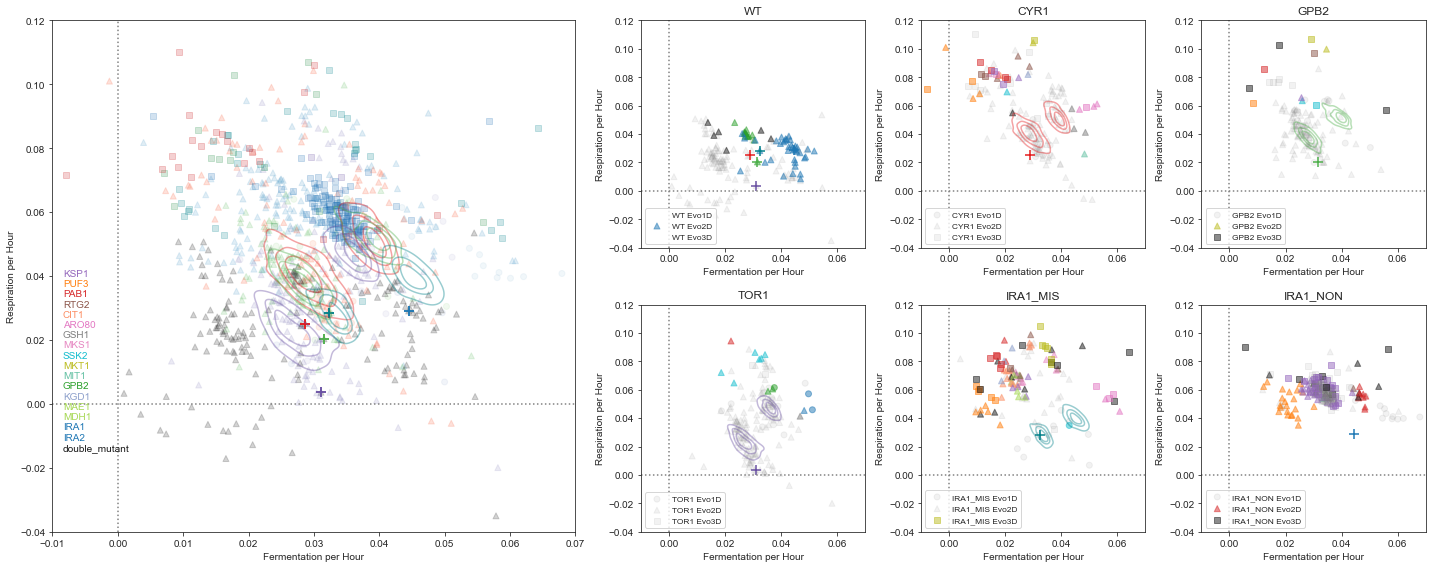

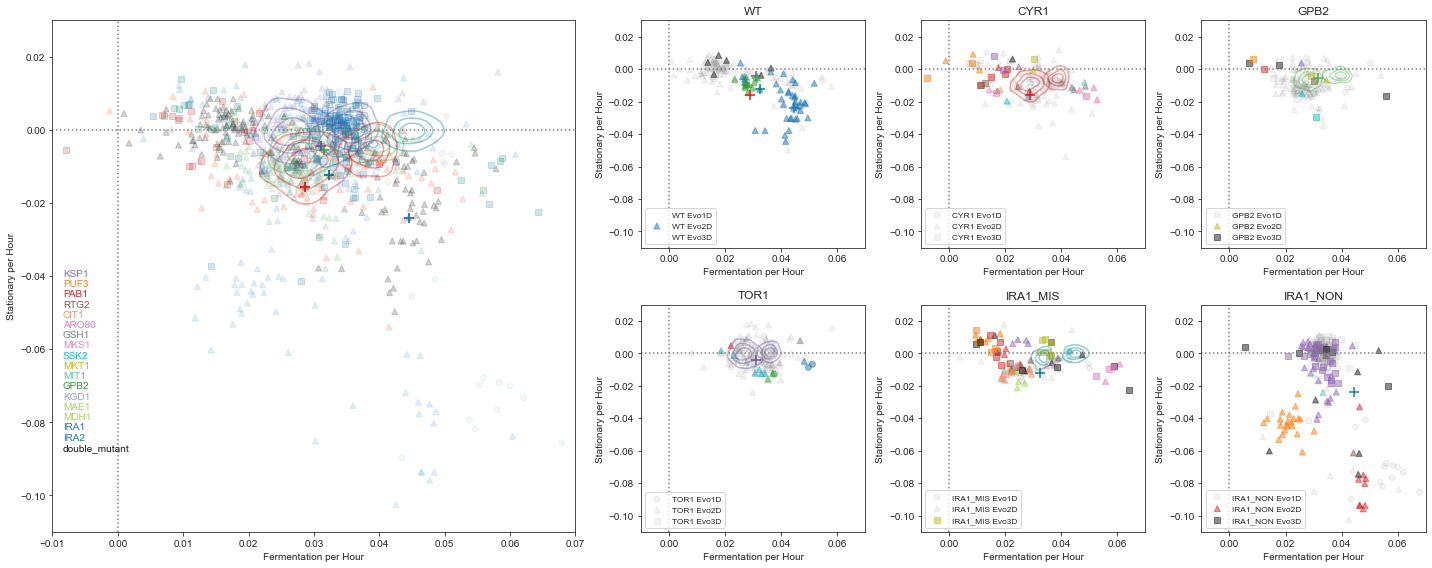

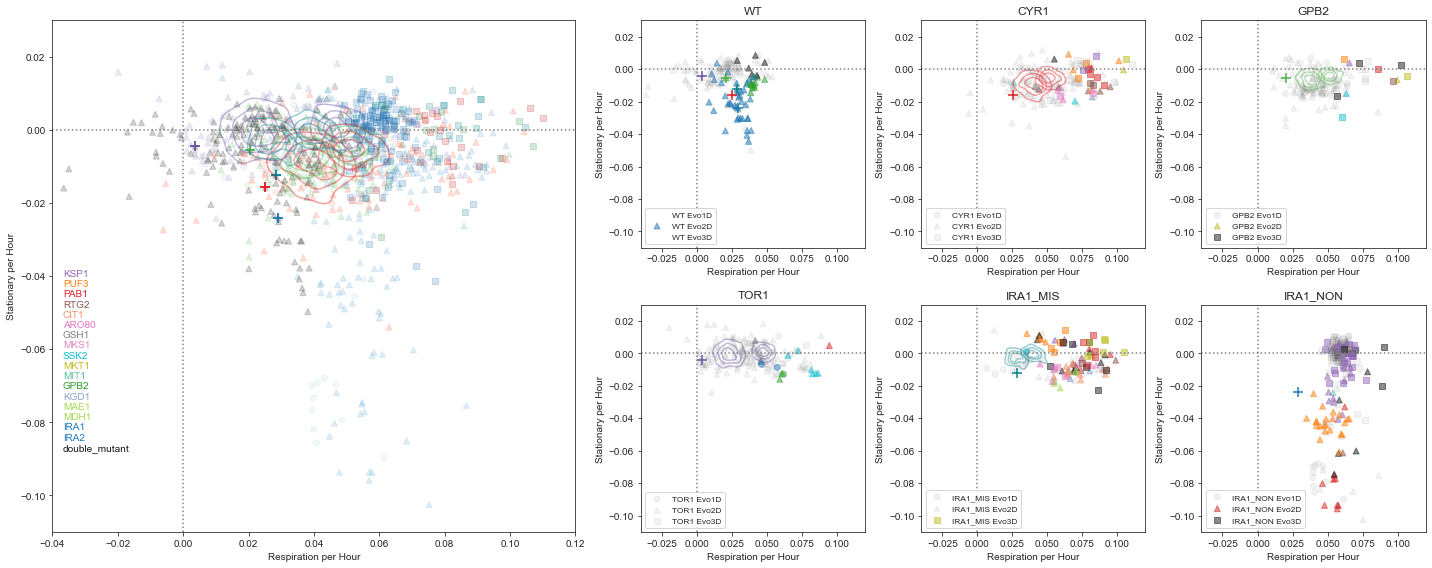

In [66]:
colors = [tools.anc_color_map[anc] for anc in merged_fitness['ancestor']]
# colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in nonan_merged['source_publication_x']]

# non_diploid = merged_fitness[merged_fitness['ploidy']!='Diploid']

xlabel = 'Fermentation per Hour'
ylabel = 'Respiration per Hour'
xdata = 'FerPerHour'
ydata = 'ResPerHour'

xlabel = 'Stationary per Hour'
ylabel = 'Respiration per Hour'
xdata = 'StaPerHour'
ydata = 'ResPerHour'
labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

# evo_cond_list = ['Evo1D']
evo_cond_list = ['Evo2D']
# evo_cond_list = ['Evo3D']
evo_cond_list = ['Evo1D','Evo2D','Evo3D']

for xdata,ydata in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
# publication_list = [['This_study','Li2019','Aggeli2020','Venkataram2015'],['Venkataram2015'],['Li2019'],['Aggeli2020'],['This_study'],['Venkataram2015','This_study']] 
    ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]
    fig = plt.figure(figsize=(20,8))
    outer_gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])

    for a,ancs in enumerate(ancestor_list):
        inner_gs = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)
#         this_anc = non_diploid[non_diploid['ancestor'].isin(ancs)]
        
        this_anc = merged_fitness[merged_fitness['ancestor'].isin(ancs)]
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values
        
        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]

        if len(ancs) > 1:
            fig.add_subplot(outer_gs[0]) 
        else:
            fig.add_subplot(inner_gs[a-1])
            
        for anc in ancs:
            if anc != 'WT':
                this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

                sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                            color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

                this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

                sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                            color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

#         for evo_cond in np.unique(this_anc['evolution_condition'].values):
        for evo_cond in evo_cond_list:
            this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
            gray_alpha = 0.1
            bold_alpha = 0.5
            if len(ancs) < 2:
                colors = []
                annotation_list = []
                for e,gene in enumerate(this_data['gene'].values):
                    color_assigned = matplotlib.colors.to_rgba('gray',0.1)
                    already_assigned = False
                    if (not p.isnull(gene)) and (gene != 'NotSequenced'):
                        if gene in tools.mutation_color_map.keys():
                            color_assigned = matplotlib.colors.to_rgba(tools.mutation_color_map[gene],bold_alpha)
                        elif '+' in gene:
                            color_assigned = matplotlib.colors.to_rgba(tools.mutation_color_map['double_mutant'],bold_alpha)
                            annotation_list.append([e,gene])
                        else:
                            color_assigned = matplotlib.colors.to_rgba('gray',0.1)
                    else:
                            color_assigned = matplotlib.colors.to_rgba('gray',0.1)
                    colors.append(color_assigned)
            else:
                colors = [tools.color_map[anc][evo_cond] for anc,evo_cond in zip(this_data['ancestor'],this_data['evolution_condition'])]

            if len(ancs) > 1:
                alpha = 0.2
#                 plt.errorbar(this_data[xdata].values,this_data[ydata].values,
#                             xerr=this_data[xdata+'_error'].values,
#                             yerr=this_data[ydata+'_error'].values,
#                             alpha=alpha,color='k',marker=' ',ls='none')
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            alpha=alpha,color=colors,marker=tools.evo_cond_marker_map[evo_cond])
               
                
            else:
                alpha = 0.3
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            color=colors,marker=tools.evo_cond_marker_map[evo_cond],label=f'{ancs[0]} {evo_cond}')
    
#                 for e,doubles in annotation_list:
#                     plt.annotate(text=doubles,xy=(this_data[xdata].values[e],this_data[ydata].values[e]),
#                                  xytext=(tools.lims[xdata][0],this_data[ydata].values[e]),
#                                 arrowprops=dict(arrowstyle="-"),color='gray')

                plt.legend(loc='lower left',fontsize='small')
                plt.title(f'{ancs[0]}')
                
            


#         for anc in ancs:
        for anc in ancs:
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]
#                 plt.errorbar(background_mutant[xdata].values,background_mutant[ydata].values,
#                             xerr=background_mutant[xdata+'_error'].values,
#                             yerr=background_mutant[ydata+'_error'].values,
#                             marker=' ',color='k',ls='none')
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc],s=100)
            else:
                for anc2 in tools.rebarcoding_source_mutants.keys():
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc2]]

                    plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc2],s=100)


        plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
        plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

        plt.xlabel(labels[xdata])
        plt.ylabel(labels[ydata])

#         plt.axvline(0,color='k',linestyle=':')
#         plt.axhline(0,color='k',linestyle=':')
        
        plt.axvline(0,color='gray',linestyle=':')
        plt.axhline(0,color='gray',linestyle=':')
        
        if len(ancs) > 1:
            for g,gene in enumerate(tools.mutation_color_map.keys()):
                plt.text(y=0.5-0.02*g,x=0.02,s=f'{gene}',color=tools.mutation_color_map[gene],transform=plt.gca().transAxes)

    plt.tight_layout()
#     plt.savefig(f'{home_dir}/figures/analysis/tradeoffs/tradeoffs_{xdata}_{ydata}_mutation_colors.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/tradeoffs/tradeoffs_{xdata}_{ydata}_mutation_colors_unannotated.pdf',bbox_inches='tight')






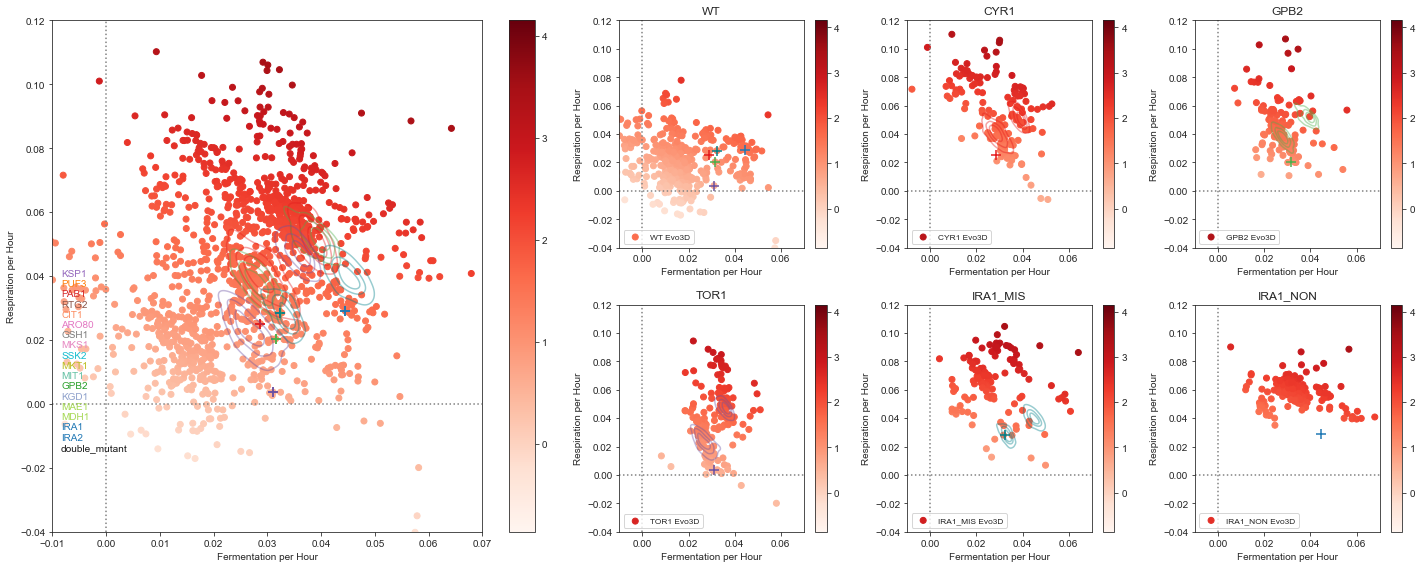

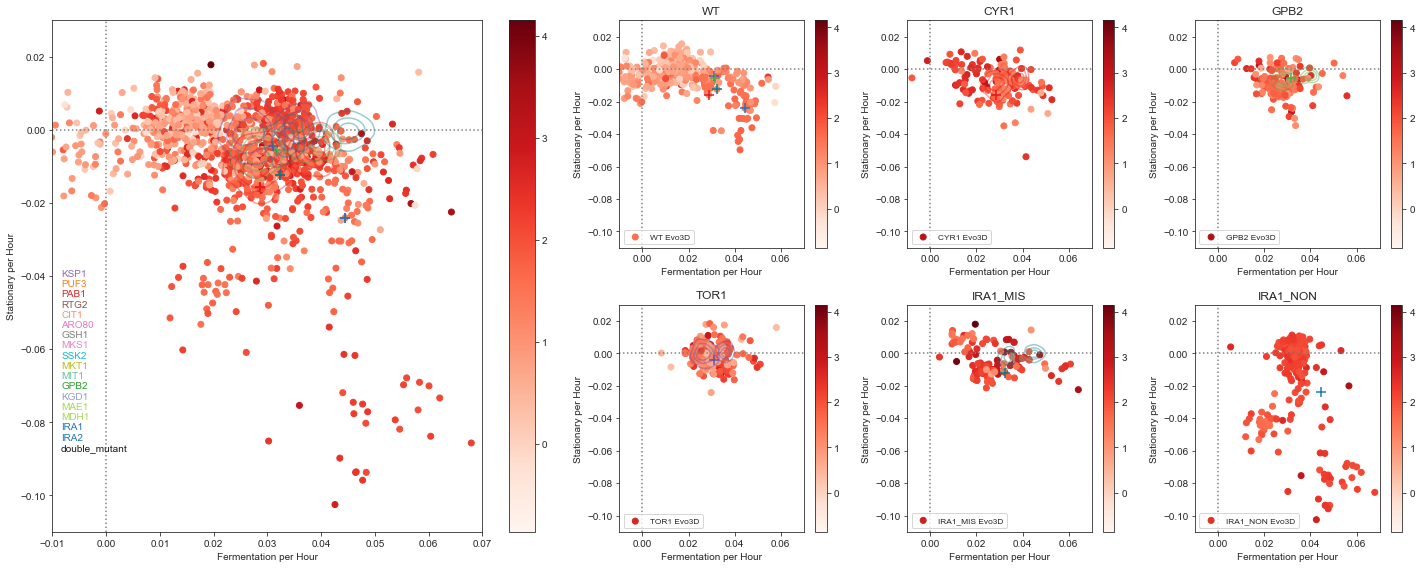

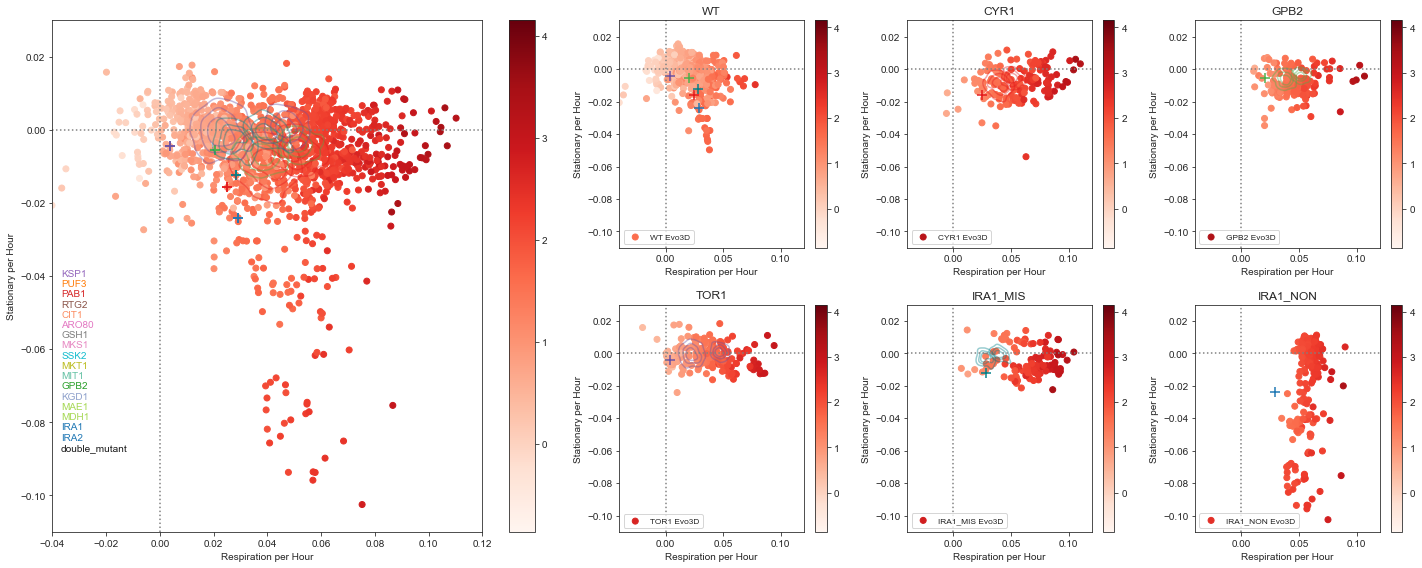

In [156]:
colors = [tools.anc_color_map[anc] for anc in merged_fitness['ancestor']]
# colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in nonan_merged['source_publication_x']]

# non_diploid = merged_fitness[merged_fitness['ploidy']!='Diploid']

xlabel = 'Fermentation per Hour'
ylabel = 'Respiration per Hour'
xdata = 'FerPerHour'
ydata = 'ResPerHour'

xlabel = 'Stationary per Hour'
ylabel = 'Respiration per Hour'
xdata = 'StaPerHour'
ydata = 'ResPerHour'
labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

# evo_cond_list = ['Evo1D']
evo_cond_list = ['Evo2D']
# evo_cond_list = ['Evo3D']
evo_cond_list = ['Evo1D','Evo2D','Evo3D']

fitness_colorby = 'Fit2D_early_fitness'
# fitness_colorby = merged_fitness['Fit3D_early_fitness']

for xdata,ydata in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
# publication_list = [['This_study','Li2019','Aggeli2020','Venkataram2015'],['Venkataram2015'],['Li2019'],['Aggeli2020'],['This_study'],['Venkataram2015','This_study']] 
    ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]
    fig = plt.figure(figsize=(20,8))
    outer_gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])

    for a,ancs in enumerate(ancestor_list):
        inner_gs = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)
#         this_anc = non_diploid[non_diploid['ancestor'].isin(ancs)]
        
        this_anc = merged_fitness[merged_fitness['ancestor'].isin(ancs)]
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values
        
        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]

        if len(ancs) > 1:
            fig.add_subplot(outer_gs[0]) 
        else:
            fig.add_subplot(inner_gs[a-1])
            
        for anc in ancs:
            if anc != 'WT':
                this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

                sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                            color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

                this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

                sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                            color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)
                
        this_data = interesting_muts

#  
        if len(ancs) > 1:
            alpha = 0.2
#                 plt.errorbar(this_data[xdata].values,this_data[ydata].values,
#                             xerr=this_data[xdata+'_error'].values,
#                             yerr=this_data[ydata+'_error'].values,
#                             alpha=alpha,color='k',marker=' ',ls='none')
            sc = plt.scatter(this_data[xdata].values,this_data[ydata].values,
                        c=this_data[fitness_colorby].values,cmap='Reds',
                        vmin=np.nanmin(merged_fitness[fitness_colorby]),
                        vmax=np.nanmax(merged_fitness[fitness_colorby]),
                        marker='o',label=f'{ancs[0]} {evo_cond}')
            plt.colorbar(sc)


        else:
            alpha = 0.3
            sc = plt.scatter(this_data[xdata].values,this_data[ydata].values,
                        c=this_data[fitness_colorby].values,cmap='Reds',
                        vmin=np.nanmin(merged_fitness[fitness_colorby]),
                        vmax=np.nanmax(merged_fitness[fitness_colorby]),
                        marker='o',label=f'{ancs[0]} {evo_cond}')
            plt.colorbar(sc)

            plt.legend(loc='lower left',fontsize='small')
            plt.title(f'{ancs[0]}')
                
            
#         for anc in ancs:
        for anc in ancs:
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]
#                 plt.errorbar(background_mutant[xdata].values,background_mutant[ydata].values,
#                             xerr=background_mutant[xdata+'_error'].values,
#                             yerr=background_mutant[ydata+'_error'].values,
#                             marker=' ',color='k',ls='none')
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc],s=100)
            else:
                for anc2 in tools.rebarcoding_source_mutants.keys():
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc2]]

                    plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[anc2],s=100)


        plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
        plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

        plt.xlabel(labels[xdata])
        plt.ylabel(labels[ydata])

#         plt.axvline(0,color='k',linestyle=':')
#         plt.axhline(0,color='k',linestyle=':')
        
        plt.axvline(0,color='gray',linestyle=':')
        plt.axhline(0,color='gray',linestyle=':')
        
        if len(ancs) > 1:
            for g,gene in enumerate(tools.mutation_color_map.keys()):
                plt.text(y=0.5-0.02*g,x=0.02,s=f'{gene}',color=tools.mutation_color_map[gene],transform=plt.gca().transAxes)

    plt.tight_layout()
#     plt.savefig(f'{home_dir}/figures/analysis/tradeoffs/tradeoffs_{xdata}_{ydata}_mutation_colors.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/tradeoffs/tradeoffs_{xdata}_{ydata}_{fitness_colorby.split("_")[0]}fitness_colors.pdf',bbox_inches='tight')







In [75]:
merged_fitness[(merged_fitness['ResPerHour']>0.08) & (merged_fitness['FerPerHour']>0.04) ][['barcode','evolution_condition','gene','class_new','all_mutations_verbose']].values

array([['TATCGAAACCCAAAGAGATTTAATCG_CGATCAAAGACTAACTTATTTTGTGG', 'Evo3D',
        'IRA1+MKT1+SPB1', 'adaptive_haploid',
        'II:441856:C:T:MMS4:synonymous_variant:c.342C>T:p.Asn114Asn:1/1~II:521600:C:A:IRA1:stop_gained:c.5029G>T:p.Glu1677*:1/1~II:522697:G:A:IRA1:missense_variant:c.3932C>T:p.Ala1311Val:1/1~III:32114:G:T:SPB1:missense_variant:c.666G>T:p.Leu222Phe:1/1~XIV:467219:A:C:MKT1:missense_variant:c.89A>C:p.Asp30Ala:1/1'],
       ['ATCACAATAACTAAACTGATTCTTCA_CTCATAACATCAAAAAAAATTCAAAT', 'Evo3D',
        'KSP1+TAN1', 'adaptive_haploid',
        'II:522427:A:T:IRA1:stop_gained:c.4202T>A:p.Leu1401*:1/1~VI:101127:T:A:LPD1:downstream_gene_variant:c.*501A>T:nan:1/1~VII:62635:G:T:TAN1:missense_variant:c.503G>T:p.Cys168Phe:0/1~VII:161471:G:C:ATG1:missense_variant:c.1407G>C:p.Leu469Phe:1/1~VIII:270229:GA:G:KSP1:frameshift_variant:c.1319delT:p.Phe440fs:0/1~VIII:271405:G:T:KSP1:stop_gained:c.144C>A:p.Tyr48*:1/1~XII:1029498:C:A:RPL6B:synonymous_variant:c.261C>A:p.Thr87Thr:1/1~XIV:204739:G:

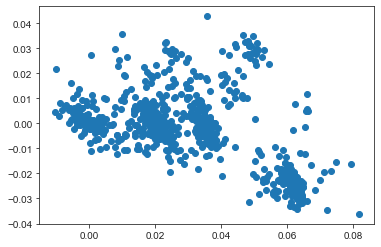

In [101]:
plt.scatter(merged_fitness[merged_fitness['source_publication'].isin(['Venkataram2015','Li2019'])]['FerPerHour_Li2019'].values,
            merged_fitness[merged_fitness['source_publication'].isin(['Venkataram2015','Li2019'])]['ResPerHour_Li2019'].values)

In [97]:
np.unique(merged_fitness['source_publication'].values)

array(['Aggeli2020', 'Li2019', 'This_study', 'Venkataram2015'],
      dtype=object)

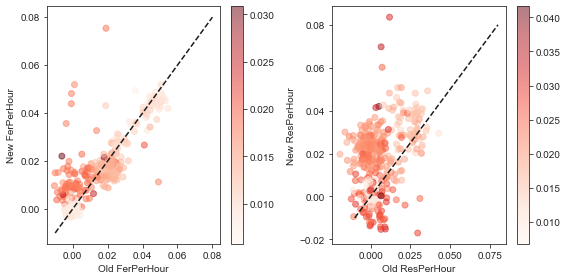

In [149]:

venk_muts = merged_fitness[merged_fitness['source_publication']=='Venkataram2015']

plt.colorbar


plt.figure(figsize=(8,4))
plt.subplot(121)
sc =plt.scatter(venk_muts['FerPerHour_Li2019'].values,venk_muts['FerPerHour'].values,alpha=0.5,
            c=np.sqrt(venk_muts['FerPerHour_error'].values),cmap='Reds')
plt.colorbar(sc)
plt.plot([-0.01,0.08],[-0.01,0.08],'k--')
plt.xlabel('Old FerPerHour')
plt.ylabel('New FerPerHour')

plt.subplot(122)
sc =plt.scatter(venk_muts['ResPerHour_Li2019'].values,venk_muts['ResPerHour'].values,alpha=0.5,
            c=np.sqrt(venk_muts['ResPerHour_error'].values),cmap='Reds')
plt.colorbar(sc)
plt.plot([-0.01,0.08],[-0.01,0.08],'k--')
plt.xlabel('Old ResPerHour')
plt.ylabel('New ResPerHour')

plt.tight_layout()